<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Deteccao_Anomalias/Tecnicas_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense,Input
from sklearn.metrics import mean_squared_error


In [ ]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Faremos a normalizacao e depois o reshape
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0


In [ ]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [ ]:
X_test_noysy = X_test + 0.5 *np.random.normal(loc=0.0, scale=1.0, size = X_test.shape)
X_test_noysy = np.clip(X_test_noysy,0.0,1.0)

In [ ]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation ='relu')(inputs)
decoder = Dense(784,activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train, epochs=100, batch_size=256, shuffle =256)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3923
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1789
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1492
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1308
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1197
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1116
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1060
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1019
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0993
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0977
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0964
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0956
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0951
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0947
Epoch 15/100
235/235 ━━━━━━━━━━━━━━━━━

In [ ]:
test_normal_decoded = autoencoder.predict(X_test)
test_anomalies_decoded = autoencoder.predict(X_test_noysy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse_normal = mean_squared_error(X_test, test_normal_decoded)
mse_anomalise = mean_squared_error(X_test, test_anomalies_decoded)

print('MSE Normal: ', mse_normal)

print('MSE anomalias: ', mse_anomalise)

MSE Normal:  0.009540066123008728
MSE anomalias:  0.08438536524772644


#LSTM para anomalias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
url_train = 'https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/Salestrain.csv'
url_test='https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/Salestest.csv'

dataset_train = pd.read_csv(url_train)
dataset_train.shape

(96, 1)

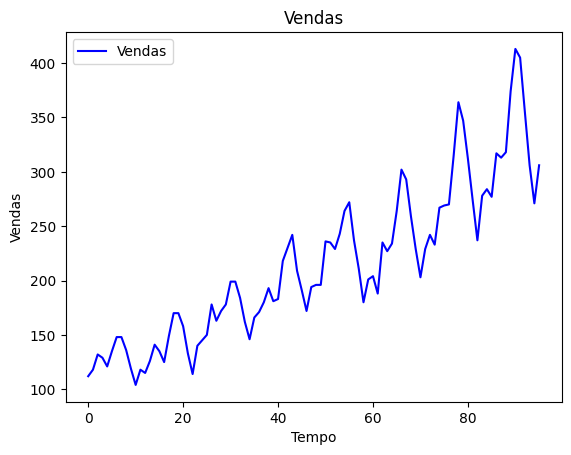

In [3]:
plt.plot(dataset_train, color='blue', label='Vendas')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(dataset_train)

In [5]:
X_train = []
y_train = []
for i in range(90, len(training_set_scaled)):
  data = training_set_scaled[i-90:i,0]
  X_train.append(data)
  y_train.append(training_set_scaled[i,0])
X_train = np.array(X_train).reshape(-1,90,1)
y_train = np.array(y_train)

In [6]:
modelo = Sequential()
modelo.add(LSTM(units=100, return_sequences = True, input_shape= (X_train.shape[1],1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=100))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
modelo.compile(optimizer="adam", loss="mean_squared_error")
modelo.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 624ms/step - loss: 0.3924
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - loss: 0.0492
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.2225
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.0276
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.1007
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.0273
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0490
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0498
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0728
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.0126
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0360
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - loss: 0.0571
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - loss: 0.0472
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0330
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.0314
Epo

(48, 1)


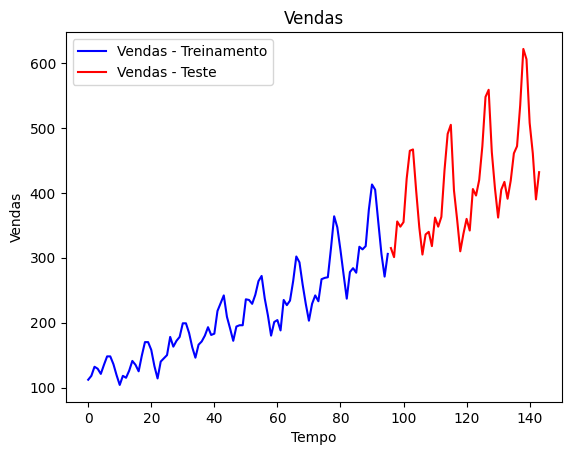

In [8]:
dataset_test = pd.read_csv(url_test)
train_values = dataset_train['data'].values
test_values = dataset_test['data'].values


print(dataset_test.shape)

train_values = dataset_train['data'].values
test_values = dataset_test['data'].values
total_values = np.concatenate((train_values, test_values), axis=0)
time_index = range(len(total_values))
plt.plot(time_index[:len(train_values)], train_values, color='blue', label='Vendas - Treinamento')
plt.plot(time_index[len(train_values):], test_values, color='red', label="Vendas - Teste")
plt.title("Vendas")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [9]:
dataset_test_anomalies = dataset_test.copy()
dataset_test_anomalies.loc[:9,'data'] = 90
dataset_test_anomalies.loc[10:34, 'data'] = np.random.uniform(100,200, size=(25,))
dataset_test_anomalies.loc[35:, 'data'] = 90

/tmp/ipython-input-3038308385.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[108.59430801 165.08472591 198.81462699 120.96643961 123.58048853
 190.47047299 101.91230978 139.00532821 117.35876912 133.69099359
 154.13661006 156.14907546 141.3203499  143.32506668 153.10950864
 109.27199956 114.36798712 119.63551784 158.47013295 157.91382957
 173.97178516 165.13874739 197.85041689 173.03129483 117.04647193]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_test_anomalies.loc[10:34, 'data'] = np.random.uniform(100,200, size=(25,))


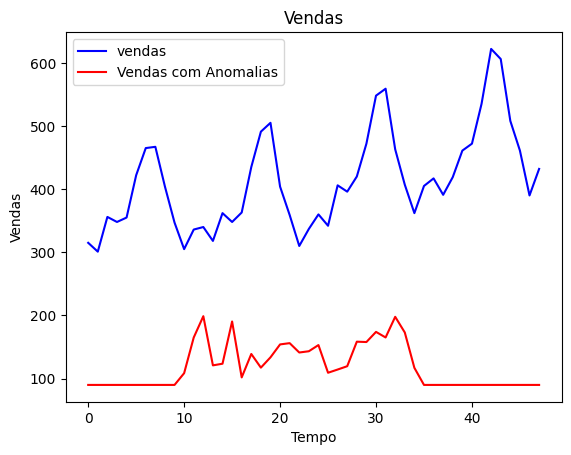

In [10]:
plt.plot(dataset_test, color='blue', label='vendas')
plt.plot(dataset_test_anomalies, color='red', label='Vendas com Anomalias')
plt.title("Vendas")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.show()


In [11]:
dataset_total = pd.concat((dataset_train['data'], dataset_test['data']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-90:]
inputs = pd.DataFrame(inputs, columns=['data'])
inputs = sc.transform(inputs)

inputs

array([[0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.29126214],
       [0.29773463],
       [0.29773463],
       [0.42718447],
       [0.42394822],
       [0.40453074],
       [0.449

In [12]:
dataset_total_anomalies = pd.concat((dataset_train['data'], dataset_test_anomalies['data']), axis=0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies)-len(dataset_test_anomalies)-90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns=['data'])
inputs_anomalies = sc.transform(inputs_anomalies)


inputs_anomalies

array([[ 0.14239482],
       [ 0.14239482],
       [ 0.10355987],
       [ 0.04854369],
       [ 0.        ],
       [ 0.04530744],
       [ 0.03559871],
       [ 0.07119741],
       [ 0.1197411 ],
       [ 0.10032362],
       [ 0.06796117],
       [ 0.14563107],
       [ 0.21359223],
       [ 0.21359223],
       [ 0.17475728],
       [ 0.09385113],
       [ 0.03236246],
       [ 0.11650485],
       [ 0.13268608],
       [ 0.14886731],
       [ 0.2394822 ],
       [ 0.19093851],
       [ 0.22006472],
       [ 0.2394822 ],
       [ 0.30744337],
       [ 0.30744337],
       [ 0.25889968],
       [ 0.18770227],
       [ 0.13592233],
       [ 0.20064725],
       [ 0.21682848],
       [ 0.24595469],
       [ 0.28802589],
       [ 0.24919094],
       [ 0.25566343],
       [ 0.36893204],
       [ 0.40776699],
       [ 0.44660194],
       [ 0.33980583],
       [ 0.2815534 ],
       [ 0.22006472],
       [ 0.29126214],
       [ 0.29773463],
       [ 0.29773463],
       [ 0.42718447],
       [ 0

In [13]:
print(inputs)

[[0.14239482]
 [0.14239482]
 [0.10355987]
 [0.04854369]
 [0.        ]
 [0.04530744]
 [0.03559871]
 [0.07119741]
 [0.1197411 ]
 [0.10032362]
 [0.06796117]
 [0.14563107]
 [0.21359223]
 [0.21359223]
 [0.17475728]
 [0.09385113]
 [0.03236246]
 [0.11650485]
 [0.13268608]
 [0.14886731]
 [0.2394822 ]
 [0.19093851]
 [0.22006472]
 [0.2394822 ]
 [0.30744337]
 [0.30744337]
 [0.25889968]
 [0.18770227]
 [0.13592233]
 [0.20064725]
 [0.21682848]
 [0.24595469]
 [0.28802589]
 [0.24919094]
 [0.25566343]
 [0.36893204]
 [0.40776699]
 [0.44660194]
 [0.33980583]
 [0.2815534 ]
 [0.22006472]
 [0.29126214]
 [0.29773463]
 [0.29773463]
 [0.42718447]
 [0.42394822]
 [0.40453074]
 [0.44983819]
 [0.51779935]
 [0.54368932]
 [0.43042071]
 [0.34627832]
 [0.24595469]
 [0.31391586]
 [0.3236246 ]
 [0.27184466]
 [0.42394822]
 [0.39805825]
 [0.42071197]
 [0.51779935]
 [0.6407767 ]
 [0.61165049]
 [0.50161812]
 [0.40453074]
 [0.32038835]
 [0.40453074]
 [0.44660194]
 [0.41747573]
 [0.52750809]
 [0.53398058]
 [0.53721683]
 [0.68

In [14]:
X_test = []
X_test_anomalies = []
for i in range(90, len(inputs)):
  X_test.append(inputs[i-90:i,0])
  X_test_anomalies.append(inputs_anomalies[i-90:i,0])
X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1],1))



In [15]:
X_test

array([[[0.14239482],
        [0.14239482],
        [0.10355987],
        ...,
        [0.65372168],
        [0.54045307],
        [0.65372168]],

       [[0.14239482],
        [0.10355987],
        [0.04854369],
        ...,
        [0.54045307],
        [0.65372168],
        [0.6828479 ]],

       [[0.10355987],
        [0.04854369],
        [0.        ],
        ...,
        [0.65372168],
        [0.6828479 ],
        [0.63754045]],

       ...,

       [[0.42394822],
        [0.40453074],
        [0.44983819],
        ...,
        [1.6763754 ],
        [1.62459547],
        [1.30744337]],

       [[0.40453074],
        [0.44983819],
        [0.51779935],
        ...,
        [1.62459547],
        [1.30744337],
        [1.15533981]],

       [[0.44983819],
        [0.51779935],
        [0.54368932],
        ...,
        [1.30744337],
        [1.15533981],
        [0.92556634]]])

In [16]:
X_test_anomalies

array([[[ 0.14239482],
        [ 0.14239482],
        [ 0.10355987],
        ...,
        [ 0.65372168],
        [ 0.54045307],
        [ 0.65372168]],

       [[ 0.14239482],
        [ 0.10355987],
        [ 0.04854369],
        ...,
        [ 0.54045307],
        [ 0.65372168],
        [-0.04530744]],

       [[ 0.10355987],
        [ 0.04854369],
        [ 0.        ],
        ...,
        [ 0.65372168],
        [-0.04530744],
        [-0.04530744]],

       ...,

       [[ 0.42394822],
        [ 0.40453074],
        [ 0.44983819],
        ...,
        [-0.04530744],
        [-0.04530744],
        [-0.04530744]],

       [[ 0.40453074],
        [ 0.44983819],
        [ 0.51779935],
        ...,
        [-0.04530744],
        [-0.04530744],
        [-0.04530744]],

       [[ 0.44983819],
        [ 0.51779935],
        [ 0.54368932],
        ...,
        [-0.04530744],
        [-0.04530744],
        [-0.04530744]]])

In [17]:
predicted_sales = modelo.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

predicted_sales_anomalies = modelo.predict(X_test_anomalies)
predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

mes_test = mean_squared_error(test_values, predicted_sales)
mes_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 


In [18]:
print(f"MSE para os dados normais: {mes_test}")
print(f"MSE para os dados com anomalias {mes_test_anomalies}")

MSE para os dados normais: 8053.84228515625
MSE para os dados com anomalias 12671.5234375


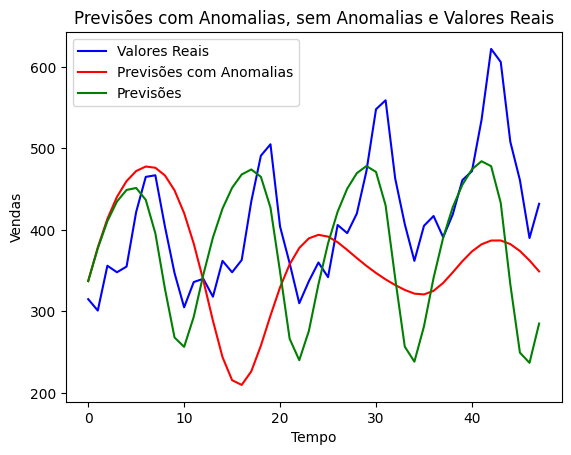

In [19]:
plt.plot(test_values, color='blue', label='Valores Reais')
plt.plot(predicted_sales_anomalies, color='red', label='Previsões com Anomalias')
plt.plot(predicted_sales, color='green', label='Previsões')
plt.title('Previsões com Anomalias, sem Anomalias e Valores Reais')
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.show()